# **A Detailed Guide on Clustering Using K-Means and Hierarchical Clustering**
# **1. Introduction**
## What is Clustering?
### Clustering is a fundamental unsupervised machine learning technique used to group similar data points based on their inherent characteristics. Unlike supervised learning, clustering doesn't rely on labeled data, it identifies patterns and structures within the data, making it essential in performing exploratory data analysis and discovering hidden patterns.
## Applications of Clustering
- ### **Market Segmentation:** Grouping customers into different groups based on purchasing behaviors.
- ### **Image Segmentation:** Separating objects within images.
- ### **Anomaly Detection:** Identifying fraudulent transactions or outlier behaviors.
- ### **Biology:** Classifying organisms or genetic data into clusters.

## K-Means vs. Hierarchical Clustering
- ### **K-Means Clustering:** A partition-based algorithm method that divides data into K partions each representing a cluster. Each cluster is represented by the mean value of the objects in the cluster. It’s efficient and works well with large datasets.
- ### **Hierarchical Clustering:** This method builds upon a hierachy of clusters. It is represented by a tree-like structre called a dendogram. It doesn’t require pre-specifying the number of clusters but is computationally expensive.
## Why the Iris Dataset?
### The Iris dataset was chosen for clustering for this tutorial due to its manageable size and clear separability. It is a classic dataset in machine learning, containing 150 samples of iris flowers from three species: setosa, versicolor, and virginica. With four numerical features (sepal length, sepal width, petal length, petal width).


## **2. Loading the Dataset**
### To begin, we load the Iris dataset using the ucimlrepo package, which fetches it from the UCI repository. Here's how we do it:
### Code to Load the Dataset

In [6]:
!pip install ucimlrepo

In [7]:
# Import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [8]:
# Fetch the Iris dataset
iris = fetch_ucirepo(id=53)

# Extract features (X) and targets (y)
X = iris.data.features
y = iris.data.targets

# Display metadata and variable information
print("Dataset Metadata:")
print(iris.metadata)
print("\nVariable Information:")
print(iris.variables)


Dataset Metadata:
{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.s

## Dataset Exploration
### Once the dataset is loaded, we check:

- ### **Features:** Sepal and petal dimensions.
- ### **Target Variable:** Flower species.
- ### **Structure:** Ensure no missing or inconsistent values.
### This initial exploration provides a clear understanding of the data we’ll be working with.

In [9]:
# Preview dataset
print("\nFirst five rows of features:")
print(X.head())
print("\nFirst five rows of target labels:")
print(y.head())


First five rows of features:
   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

First five rows of target labels:
         class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa


## **3. Data Preprocessing**
## Why Preprocess?
### Clustering algorithms like K-Means and Hierarchical Clustering are sensitive to the scale of features. For instance, petal length (measured in centimeters) might dominate clustering results compared to sepal width. To address this, we standardize features to have a mean of 0 and a variance of 1 using StandardScaler.
### Code for Scaling


In [10]:
# Scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check scaled data
print("\nScaled data (first five rows):")
print(X_scaled[:5])


Scaled data (first five rows):
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


### Scaling ensures all features contribute equally to the clustering process, leading to better results.

## **4. K-Means Clustering**
## Implementing K-Means
### K-Means partitions data into k clusters by minimizing the within-cluster variance. To find the optimal number of clusters, we use the Elbow Method:

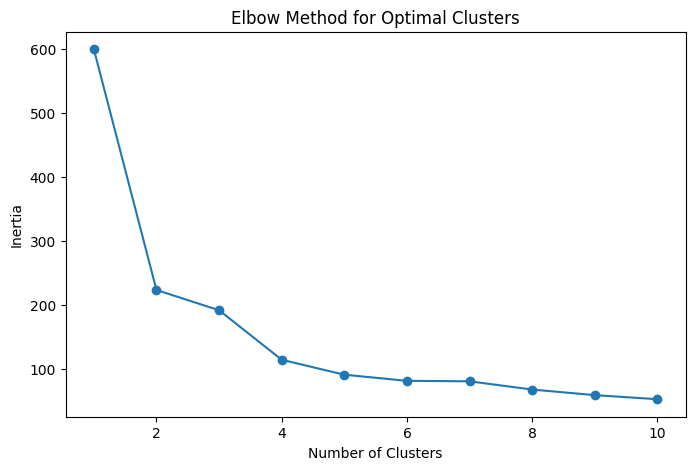

In [11]:
# Determine the optimal number of clusters using the elbow method
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


# Plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Visualizing K-Means Clusters
### After selecting an optimal k (e.g., 3), we fit K-Means and visualize the clusters in 2D using PCA:

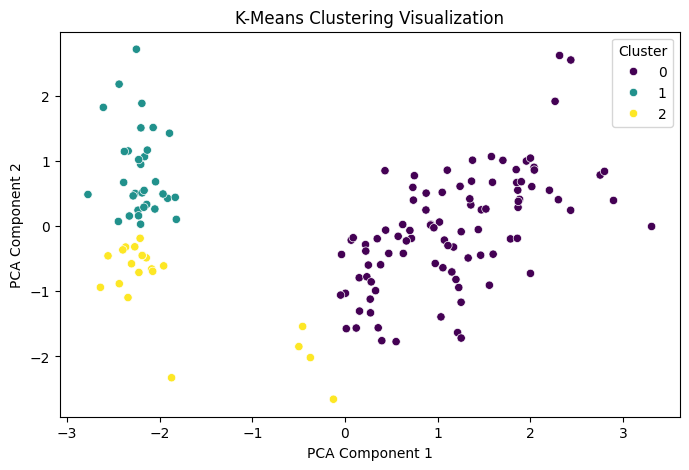

In [12]:
# Fit K-Means with the optimal number of clusters (let's assume 3 for now)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_kmeans, palette='viridis')
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()



## Evaluating Clusters
### We compute the Silhouette Score for K-Means to evaluate the quality of clustering:

In [13]:
# Evaluate K-Means Clustering
silhouette_avg = silhouette_score(X_scaled, clusters_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_avg:.3f}")

Silhouette Score for K-Means: 0.479


# **5. Hierarchical Clustering**
## Implementing Hierarchical Clustering
### Hierarchical clustering builds a dendrogram to show how data points are grouped:

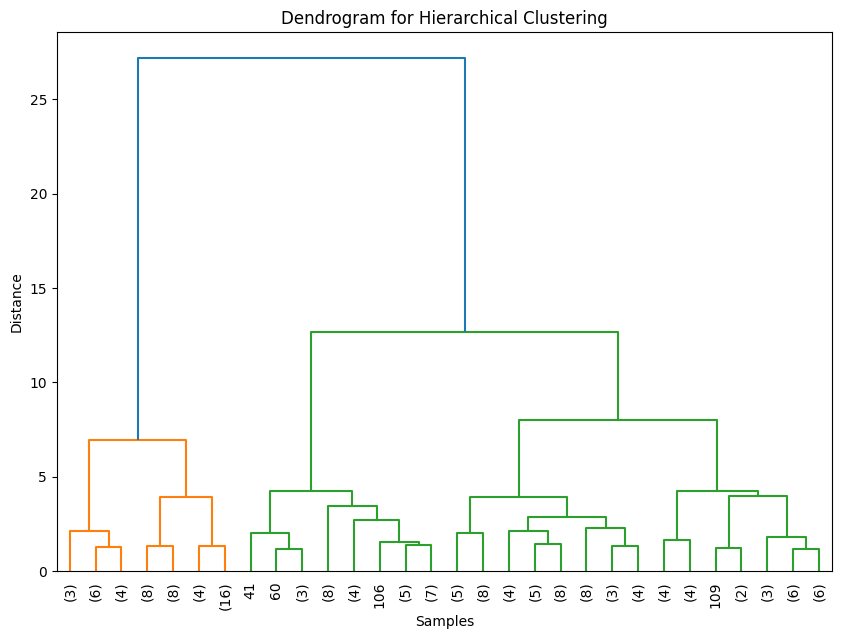

In [14]:
# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Create an AgglomerativeClustering model and fit it
agglo = AgglomerativeClustering(n_clusters=3)
clusters_hierarchical = agglo.fit_predict(X_scaled)

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### Compute Silhouette Score for Hierarchical Clustering

In [15]:
# Calculate the silhouette score
silhouette_avg_hierarchical = silhouette_score(X_scaled, clusters_hierarchical)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical:.3f}")


Silhouette Score for Hierarchical Clustering: 0.446


## Comparing with K-Means
### We can assign clusters from the dendrogram and visualize them in the same PCA-reduced space:

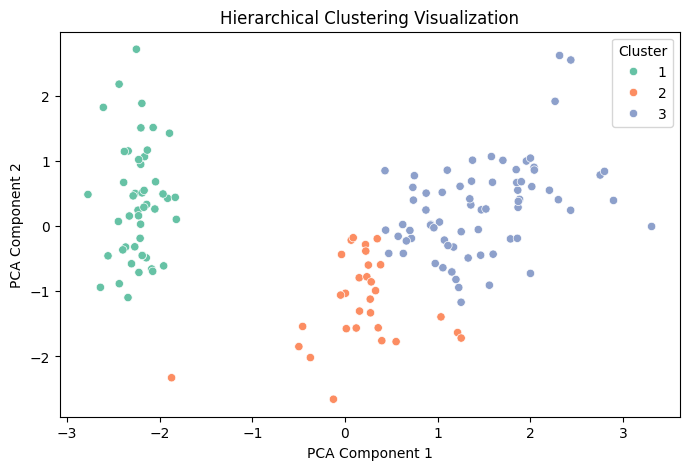

In [16]:
# Assign clusters from hierarchical clustering
from scipy.cluster.hierarchy import fcluster
clusters_hierarchical = fcluster(linked, t=3, criterion='maxclust')

# Visualize clusters using PCA
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_hierarchical, palette='Set2')
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

# **6. Conclusion**
## Key Insights
- ### **K-Means:** Efficient and suitable for larger datasets. However, it requires pre-specifying the number of clusters. In this analysis, K-Means achieved a Silhouette Score of 0.479, indicating better clustering performance on the Iris dataset. This suggests that K-Means grouped data points more cohesively within clusters and separated clusters better compared to Hierarchical Clustering.
- ### **Hierarchical Clustering:** Provides more interpretability via dendrograms but is computationally expensive for large datasets. Hierarchical Clustering achieved a Silhouette Score of 0.446, which is slightly lower than K-Means. This may indicate challenges in separating clusters optimally or merging some points prematurely.
## Strengths and Weaknesses
- ### **K-Means:** Strengths include speed and simplicity; weaknesses include sensitivity to outliers and spherical cluster assumption.
- ### **Hierarchical Clustering:** Strengths include flexibility in cluster shapes; weaknesses include computational inefficiency and lack of scalability.


# **7. References**
## **UCI Machine Learning Repository:** Fisher, R. (1936). Iris [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.
## **Blog:** Clustering with Confidence: A Practical Guide to Data Clustering in Python (https://medium.com/@nomannayeem/clustering-with-confidence-a-practical-guide-to-data-clustering-in-python-15d82d8a7bfb).
## **Python Libraries:** sklearn, scipy, seaborn, and matplotlib documentation.

## **Key Scientific Papers:**

### 1. **"A Taxonomy of Machine Learning Clustering Algorithms, Challenges, and Future Realms"**  
###   This paper reviews traditional and modern clustering techniques, presenting a taxonomy and discussing challenges like scalability and dimensionality.  
###   *Reference*: [MDPI Applied Sciences](https://www.mdpi.com)【100】.

### 2. **"Clustering Algorithms: A Comparative Approach"**  
###   This study compares the performance of clustering algorithms across diverse datasets, examining how parameter tuning and algorithmic choice influence outcomes.  
###   *Reference*: [PLOS ONE](https://journals.plos.org)【101】.

### 3. **"Big Data Clustering: Trends and Challenges"**  
###    Explores clustering techniques adapted for big data, addressing challenges in data dimensionality and distributed processing.  
###   *Reference*: Check on scientific databases such as IEEE Xplore or Springer for similar works.
